# Credit Task - 1

## Part  - I

Datafile: SCADI.csv

Data Description: This dataset contains 206 attributes of 70 children with physical and motordisability based on ICF-CY. For more information click this link.

1. Determine the number of subgroups from the dataset using attributes 3 to 205 i.e.,exclude attributes 1, 2 and 206. Is this number the same as the number of classes presented by attribute 206? Explain and justify your findings.

2. Is this data facing the curse of dimensionality? If so, then how to solve this problem. Explain with a two-dimensional plot and report relevant loss of information.

3. After applying principal component analysis (PCA) on a given dataset, it was found that the percentage of variance for the first N components is X%. How is this percentage of variance computed?



# Part - I (Solutions)

### Import Libraries

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE
from numpy.linalg import eigh


 
plt.style.use('ggplot')

### Import Data

In [312]:
# load the dataset (SCADI.csv) using pandas
ScadiData = pd.read_csv('SCADI.csv', header=None)
org_ScadiData = ScadiData.copy()

In [313]:
ScadiData.columns = ScadiData.iloc[0]
ScadiData = ScadiData[1:]
ScadiData

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
1,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
2,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
4,1,18,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
5,0,19,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,15,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,class4
67,0,9,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,class3
68,1,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
69,1,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6


## 1. exclude attributes 1, 2 and 206.

In [314]:
SubGroupScadiData = ScadiData.drop(['Gender', 'Age', 'Classes'], axis=1)
SubGroupScadiData

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-4,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
67,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
68,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
69,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Attribute - 206 check how many number of classes present

In [315]:
classes = ScadiData['Classes'].unique()

In [316]:
print(f"{len(classes)} classes present in attribute 206 are {classes}")

7 classes present in attribute 206 are ['class6' 'class2' 'class4' 'class7' 'class1' 'class5' 'class3']


(array([29.,  7.,  0., 12.,  0., 16.,  2.,  0.,  3.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

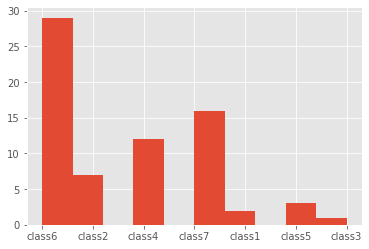

In [317]:
plt.hist(ScadiData['Classes'])

Text(0, 0.5, 'Count')

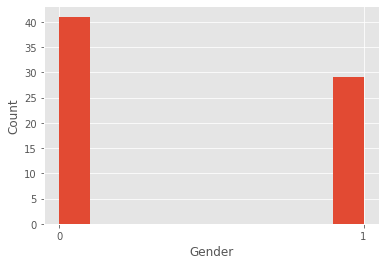

In [318]:
plt.hist(ScadiData['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')

## 1. Determine the number of subgroups from the dataset using attributes 3 to 205

In [319]:
SubGroupScadiData.columns

Index(['d 5100-0', 'd 5100-1', 'd 5100-2', 'd 5100-3', 'd 5100-4', 'd 5100-8',
       'd 5100-9', 'd 5101-0', 'd 5101-1', 'd 5101-2',
       ...
       'd 57022-4', 'd 57022-8', 'd 57022-9', 'd 571-0', 'd 571-1', 'd 571-2',
       'd 571-3', 'd 571-4', 'd 571-8', 'd 571-9'],
      dtype='object', name=0, length=203)

In [320]:
activity = []
for col in SubGroupScadiData.columns:
    feature_catergory = col.split('-')[0].split('d ')[1]
    activity.append(feature_catergory)

In [321]:
# Function to find the repeating items in the list and find their frequency count.
def findRepeating(activity):
    
    frequency = {}
    
    for item in activity:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1
    
    return frequency

In [322]:
activity_list = set(activity)
print(f"{len(activity_list)} subgroups from the dataset using attributes 3 to 205 are inferred.")

print(f"\nThose 29 subgroups names are {activity_list}")

29 subgroups from the dataset using attributes 3 to 205 are inferred.

Those 29 subgroups names are {'5302', '5600', '5404', '5402', '5101', '5400', '5200', '5102', '5100', '5203', '5403', '5401', '5201', '5700', '53000', '53001', '57022', '53010', '57020', '57021', '5602', '5501', '53011', '5500', '5205', '571', '5701', '5202', '5204'}


Twenty-nine activities in seven categories are mentioned below are considered as self-care activities,

    1. Washing oneself
    2. Caring for body parts
    3. Toileting
    4. Dressing
    5. Eating
    6. Drinking
    7. Looking after one’s health and looking after one’s safety.

In [323]:
frequency = findRepeating(activity)
print(frequency)

{'5100': 7, '5101': 7, '5102': 7, '5200': 7, '5201': 7, '5202': 7, '5203': 7, '5204': 7, '5205': 7, '53000': 7, '53001': 7, '53010': 7, '53011': 7, '5302': 7, '5400': 7, '5401': 7, '5402': 7, '5403': 7, '5404': 7, '5500': 7, '5501': 7, '5600': 7, '5602': 7, '5700': 7, '5701': 7, '57020': 7, '57021': 7, '57022': 7, '571': 7}


Each of self-care activity listed above has one of the seven values represented for the level are follows 

    1. NO impairment
    2. 2MILD impairment
    3. MODERATE impairment
    4. SEVERE impairment
    5. COMPLETE impairment
    6. NOT Specified
    7. NOT Applicable

## 2. Is this data facing the curse of dimensionality? If so, then how to solve this problem. Explain with a two-dimensional plot and report relevant loss of information.


In [324]:
X= ScadiData.loc[:,'d 5100-0':'d 571-9']
X=X.values
y=ScadiData.loc[:, 'Classes']
y_true = y.str.extract('(\d+)').astype(int)
scale=StandardScaler()
X_scaled=scale.fit_transform(X)
X_scaled_df = pd.DataFrame(data=X_scaled, columns=SubGroupScadiData.columns)

In [325]:
X_scaled_df

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-4,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9
0,-0.27735,-0.408248,-0.610368,-0.454859,1.384437,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,-0.677003,-0.431788,3.265986,0.0,0.0
1,-0.27735,-0.408248,-0.610368,-0.454859,1.384437,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,-0.677003,2.315953,-0.306186,0.0,0.0
2,-0.27735,-0.408248,-0.610368,2.198484,-0.722315,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,-0.677003,2.315953,-0.306186,0.0,0.0
3,-0.27735,-0.408248,-0.610368,-0.454859,1.384437,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,1.477098,-0.431788,-0.306186,0.0,0.0
4,-0.27735,-0.408248,-0.610368,-0.454859,1.384437,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,1.477098,-0.431788,-0.306186,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.27735,-0.408248,1.638356,-0.454859,-0.722315,0.0,0.0,0.0,-0.333333,1.699673,...,-0.120386,0.0,0.0,-0.359211,1.429503,-0.677003,-0.431788,-0.306186,0.0,0.0
66,-0.27735,-0.408248,1.638356,-0.454859,-0.722315,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,2.783882,-0.699544,-0.677003,-0.431788,-0.306186,0.0,0.0
67,-0.27735,-0.408248,-0.610368,2.198484,-0.722315,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,1.477098,-0.431788,-0.306186,0.0,0.0
68,-0.27735,-0.408248,-0.610368,2.198484,-0.722315,0.0,0.0,0.0,-0.333333,-0.588348,...,-0.120386,0.0,0.0,-0.359211,-0.699544,-0.677003,2.315953,-0.306186,0.0,0.0


## Explain with a two-dimensional plot and report relevant loss of information.


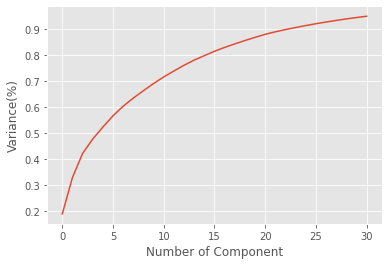

In [326]:
pca=PCA(n_components=31)
X_PCA=pca.fit_transform(X_scaled_df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Variance(%)')
plt.show()

Insights :- Number of component > 30, the variance is almost reaching 1. Thus the remaining components of features 30 to 203 are mere loss of information. 

## Is this data facing the curse of dimensionality? If so, then how to solve this problem.

Yes. Data is facing the curse of dimensionality.

## 3. After applying principal component analysis (PCA) on a given dataset, it was found that the percentage of variance for the first N components is X%. How is this percentage of variance computed?


In [327]:
pca = PCA(n_components=10)
pca.fit_transform(X_scaled_df)
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [328]:
print(f"{eigenvalues[0]:.2f}% of variance for the first components")

26.82% of variance for the first components


In [329]:
prop_var[0]

0.18880680852742077

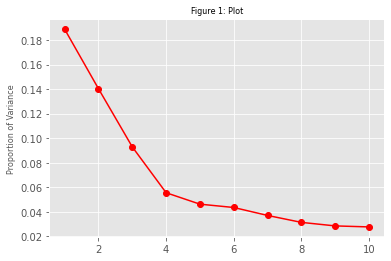

In [330]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [331]:
# Determine covariance matrix
cov_matrix = np.cov(X_scaled_df, rowvar=False)
# Determine eigenvalues and eigenvectors
egnvalues, egnvectors = eigh(cov_matrix)
# Determine explained variance
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

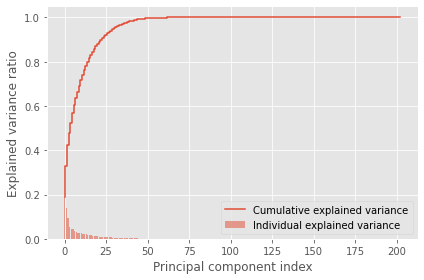

In [332]:
# Plot the explained variance against cumulative explained variance
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Part - II

Dataset filename: obesity_levels.csv

Dataset description: This dataset includes data for the estimation of obesity levels in individuals
based on their eating habits and physical condition. The data contains 17 attributes and 2111
records.

Features and labels: The attribute names are listed below. The description of the attributes can be
found in this article (web-link).

4. Create a machine learning (ML) model for predicting “weight” using all features except “NObeyesdad” and report observed performance. Explain your results based on following criteria:
    a. What model have you selected for solving this problem and why?

    b. Have you made any assumption for the target variable? If so, then why?

    c. What have you done with text variables? Explain.

    d. Have you optimized any model parameters? What is the benefit of this action?

    e. Have you applied any steps for handling overfitting or underfitting issues? What is that?

# Part - II (Solutions)

### Import Libraries

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from  sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import linear_model


### Import Data

In [334]:
ObesityData = pd.read_csv('ObesityDataSet.csv')
ObesityData

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [335]:
ObesityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Insights :- 8 numerical columns and 9 categorical columns are present.

In [336]:
numerical_data = ObesityData.describe()
categorical_data_df = ObesityData.drop(list(numerical_data), axis=1)
categorical_data = categorical_data_df.describe()
numerical_data_df = ObesityData.drop(list(categorical_data), axis=1)

In [337]:
numerical_data_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [338]:
categorical_data_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [339]:
#Function will give a idea how much missing data are there each column attributes
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe

In [340]:
missing_check(ObesityData)

,Total,Percent
Gender,0,0.0
SMOKE,0,0.0
MTRANS,0,0.0
CALC,0,0.0
TUE,0,0.0
FAF,0,0.0
SCC,0,0.0
CH2O,0,0.0
CAEC,0,0.0
Age,0,0.0


Insights :- No missing data. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


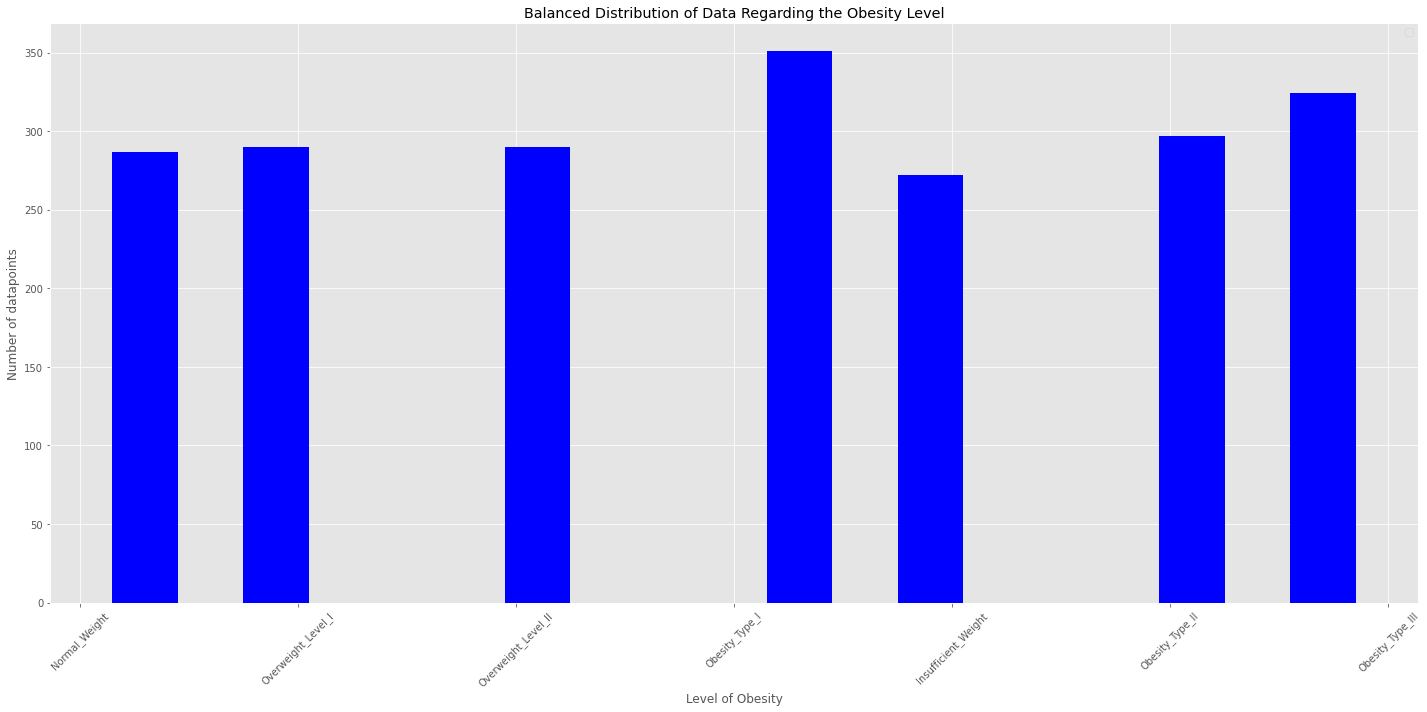

In [341]:
plt.figure(figsize=(20, 10))
plt.hist(ObesityData['NObeyesdad'], rwidth=0.5, color='blue')
plt.xlabel("Level of Obesity")
plt.ylabel("Number of datapoints")
plt.title('Balanced Distribution of Data Regarding the Obesity Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## c. What have you done with text variables? Explain.

All the categorical data or test variables are converted numerical data using label encoder technique.

In [342]:
# Encoding the categorical data to numerical data
Label_Encoder=LabelEncoder()
ObesityData_Encoded_df=categorical_data_df.drop(['NObeyesdad'], axis=1).apply(Label_Encoder.fit_transform)

In [343]:
ObesityData_concat_df = pd.concat([ObesityData_Encoded_df, numerical_data_df], axis=1)
ObesityData_concat_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,2,0,0,3,3,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,0,1,0,2,1,1,2,3,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,1,1,0,2,0,0,1,3,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,1,0,0,2,0,0,1,4,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,1,0,0,2,0,0,2,3,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,1,2,0,0,2,3,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,0,1,1,2,0,0,2,3,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,0,1,1,2,0,0,2,3,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,0,1,1,2,0,0,2,3,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [344]:
ObesityData_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   family_history_with_overweight  2111 non-null   int64  
 2   FAVC                            2111 non-null   int64  
 3   CAEC                            2111 non-null   int64  
 4   SMOKE                           2111 non-null   int64  
 5   SCC                             2111 non-null   int64  
 6   CALC                            2111 non-null   int64  
 7   MTRANS                          2111 non-null   int64  
 8   Age                             2111 non-null   float64
 9   Height                          2111 non-null   float64
 10  Weight                          2111 non-null   float64
 11  FCVC                            2111 non-null   float64
 12  NCP                             21

Insights:- All the datapoints are converted to numerical data points since I have chosen to implement linear regression model.

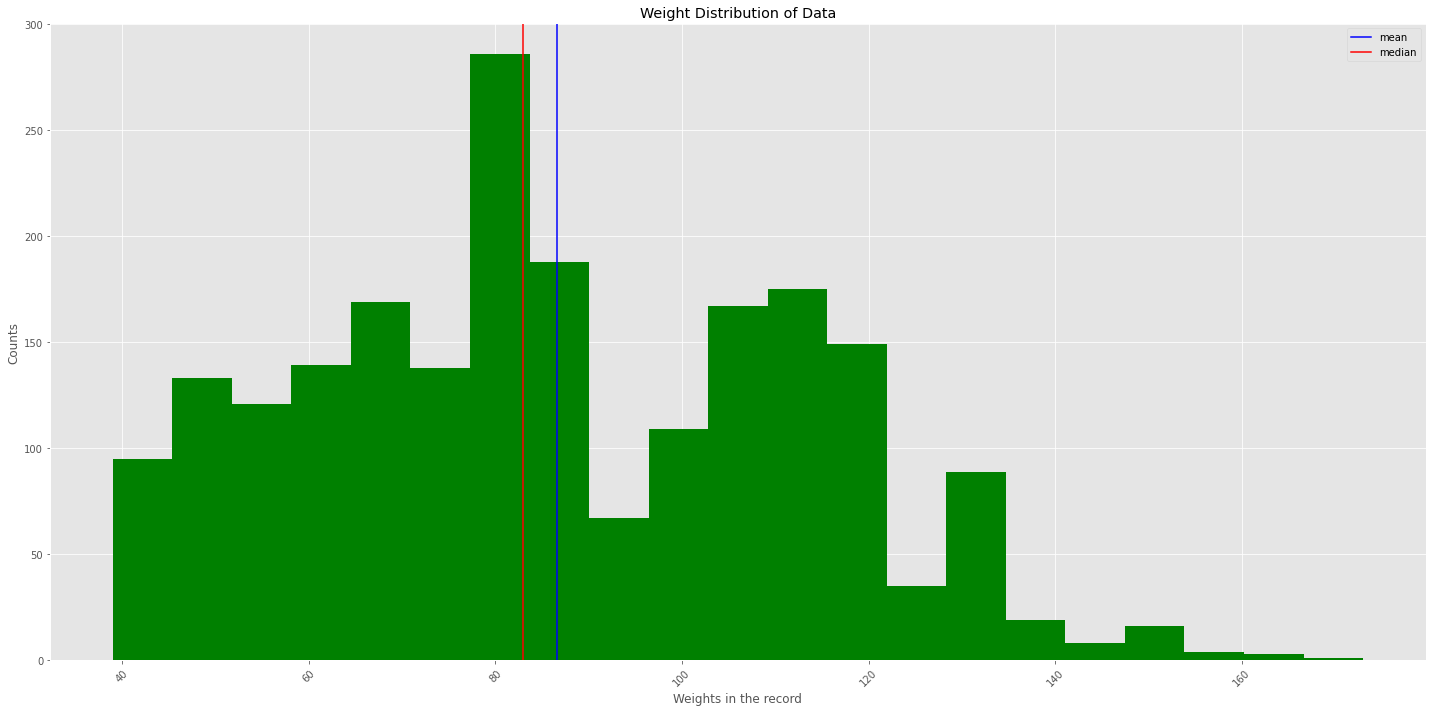

In [345]:
plt.figure(figsize=(20, 10))
plt.hist(ObesityData['Weight'], bins="fd", color='green')
plt.axvline(ObesityData['Weight'].mean(), color = "blue", label = "mean")
plt.axvline(ObesityData['Weight'].median(), color = "red", label = "median")
plt.xlabel("Weights in the record")
plt.ylabel("Counts")
plt.title('Weight Distribution of Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## b. Have you made any assumption for the target variable? If so, then why?

Yes. The above histplot distribution seems to be bi-model type. The mean and median are shifted to left because larger number of people above 250 counts are weighing 80 Kg.

In [346]:
X_ObesityData = ObesityData_concat_df.drop(['Weight'], axis=1)
y_true = ObesityData_concat_df['Weight']

In [347]:
X_ObesityData

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,2,0,0,3,3,21.000000,1.620000,2.0,3.0,2.000000,0.000000,1.000000
1,0,1,0,2,1,1,2,3,21.000000,1.520000,3.0,3.0,3.000000,3.000000,0.000000
2,1,1,0,2,0,0,1,3,23.000000,1.800000,2.0,3.0,2.000000,2.000000,1.000000
3,1,0,0,2,0,0,1,4,27.000000,1.800000,3.0,3.0,2.000000,2.000000,0.000000
4,1,0,0,2,0,0,2,3,22.000000,1.780000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,1,2,0,0,2,3,20.976842,1.710730,3.0,3.0,1.728139,1.676269,0.906247
2107,0,1,1,2,0,0,2,3,21.982942,1.748584,3.0,3.0,2.005130,1.341390,0.599270
2108,0,1,1,2,0,0,2,3,22.524036,1.752206,3.0,3.0,2.054193,1.414209,0.646288
2109,0,1,1,2,0,0,2,3,24.361936,1.739450,3.0,3.0,2.852339,1.139107,0.586035


In [348]:
y_true

0        64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2111, dtype: float64

Insights:- "Since ML model is goint to predict Weight it's choosen to be target-variable."

## a. What model have you selected for solving this problem and why?

I have chosen linear regression model since it's simple one to evaluate. But by seeing the results r2_score is only 56%. It turn out to be worst model I have chosen for this type of problem.

In [349]:
model_lr=LinearRegression()

In [350]:
# Split the dataset to train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X_ObesityData, y_true, test_size=.3)

In [351]:
# Training the linear regression model
model = model_lr.fit(xtrain, ytrain)

In [352]:
# Predict the weights of trained model
ypred = model.predict(xtest)

In [353]:
# Evaluation of Results using r2score
r2_score(ytest, ypred)


0.569027467378692

## d. Have you optimized any model parameters? What is the benefit of this action? 

Yes. I was to use ridge regression techniques to see any improvement on accuracy. But it turns out to worst prediction with r2_score of 51%.

In [354]:
#Using ridge instead of normal linear regression 
ridge = linear_model.Ridge(alpha=10)
ridge.fit(xtrain, ytrain)
y_ridge_pred = ridge.predict(xtest)

In [355]:
training_ridge = ridge.score(xtrain, ytrain)
print("training accuracy with ridge ",training_ridge )

training accuracy with ridge  0.5105982895180307


In [356]:
# Evaluation of Results using r2score
r2_score(ytest, y_ridge_pred)

0.5162438412488272

## e. Have you applied any steps for handling overfitting or underfitting issues? What is that?

No, I haven't tried for this. Since I have to consider different ML model technique. For that model I will work on handling overfitting or underfitting issue.